In [1]:
# Importation des librairies
import sys
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as drawPieplot
import seaborn as sns

In [2]:
print(os.listdir('.'))

['.cache', 'README.ipynb', '.ipynb_checkpoints', 'anaconda_projects', '.virtualenvs', 'application_train.csv', '.bashrc', '.conda', '.gitconfig', 'p4_modelisation.ipynb', '.npm', 'p4_csv.zip', '.profile', '.config', 'p4_X_clean_encoded.csv', '.anaconda', 'p4_analyse.ipynb', '.ipython', '.jupyter', '.local', 'output.png', 'catboost_info', 'data_cleaned_ready.csv', '.vimrc', '.pythonstartup.py', 'p4_X_clean.csv', 'Untitled Folder']


In [3]:
# Chargement des données
data = pd.read_csv("application_train.csv", sep=",")

In [4]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Aperçu rapide des extrémités
data.tail()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


In [6]:
# Dimensions du dataset
nb_lignes, nb_colonnes = data.shape
print(f"Nombre de lignes : {nb_lignes}")
print(f"Nombre de colonnes : {nb_colonnes}")

Nombre de lignes : 307511
Nombre de colonnes : 122


In [7]:
# Aperçu général du contenu
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [8]:
# Statistiques globales
data.describe(include="all")


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511,307511,307511,307511,307511.000000,3.075110e+05,3.075110e+05,307499.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
unique,NaN,NaN,2,3,2,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Cash loans,F,N,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,278232,202448,202924,213312,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,278180.518577,0.080729,NaN,NaN,NaN,NaN,0.417052,1.687979e+05,5.990260e+05,27108.573909,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,NaN,NaN,NaN,NaN,0.722121,2.371231e+05,4.024908e+05,14493.737315,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,2.565000e+04,4.500000e+04,1615.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.125000e+05,2.700000e+05,16524.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,1.471500e+05,5.135310e+05,24903.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,NaN,NaN,NaN,NaN,1.000000,2.025000e+05,8.086500e+05,34596.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000


In [9]:
# Total de lignes
total_rows = data.shape[0]

# Calcul du nombre et pourcentage de NaN
missing_data = data.isnull().sum().to_frame(name='Nb de NaN')
missing_data['% de NaN'] = (missing_data['Nb de NaN'] / total_rows * 100).round(2)

# Ne garder que les colonnes avec au moins un NaN
missing_data = missing_data[missing_data['Nb de NaN'] > 0]

# Trier par % de NaN décroissant
missing_data = missing_data.sort_values(by='% de NaN', ascending=False)

# Affichage
missing_data

,Nb de NaN,% de NaN
COMMONAREA_MEDI,214865,69.87
COMMONAREA_AVG,214865,69.87
COMMONAREA_MODE,214865,69.87
NONLIVINGAPARTMENTS_MEDI,213514,69.43
NONLIVINGAPARTMENTS_MODE,213514,69.43
...,...,...
EXT_SOURCE_2,660,0.21
AMT_GOODS_PRICE,278,0.09
DAYS_LAST_PHONE_CHANGE,1,0.00
CNT_FAM_MEMBERS,2,0.00


<function matplotlib.pyplot.show(close=None, block=None)>

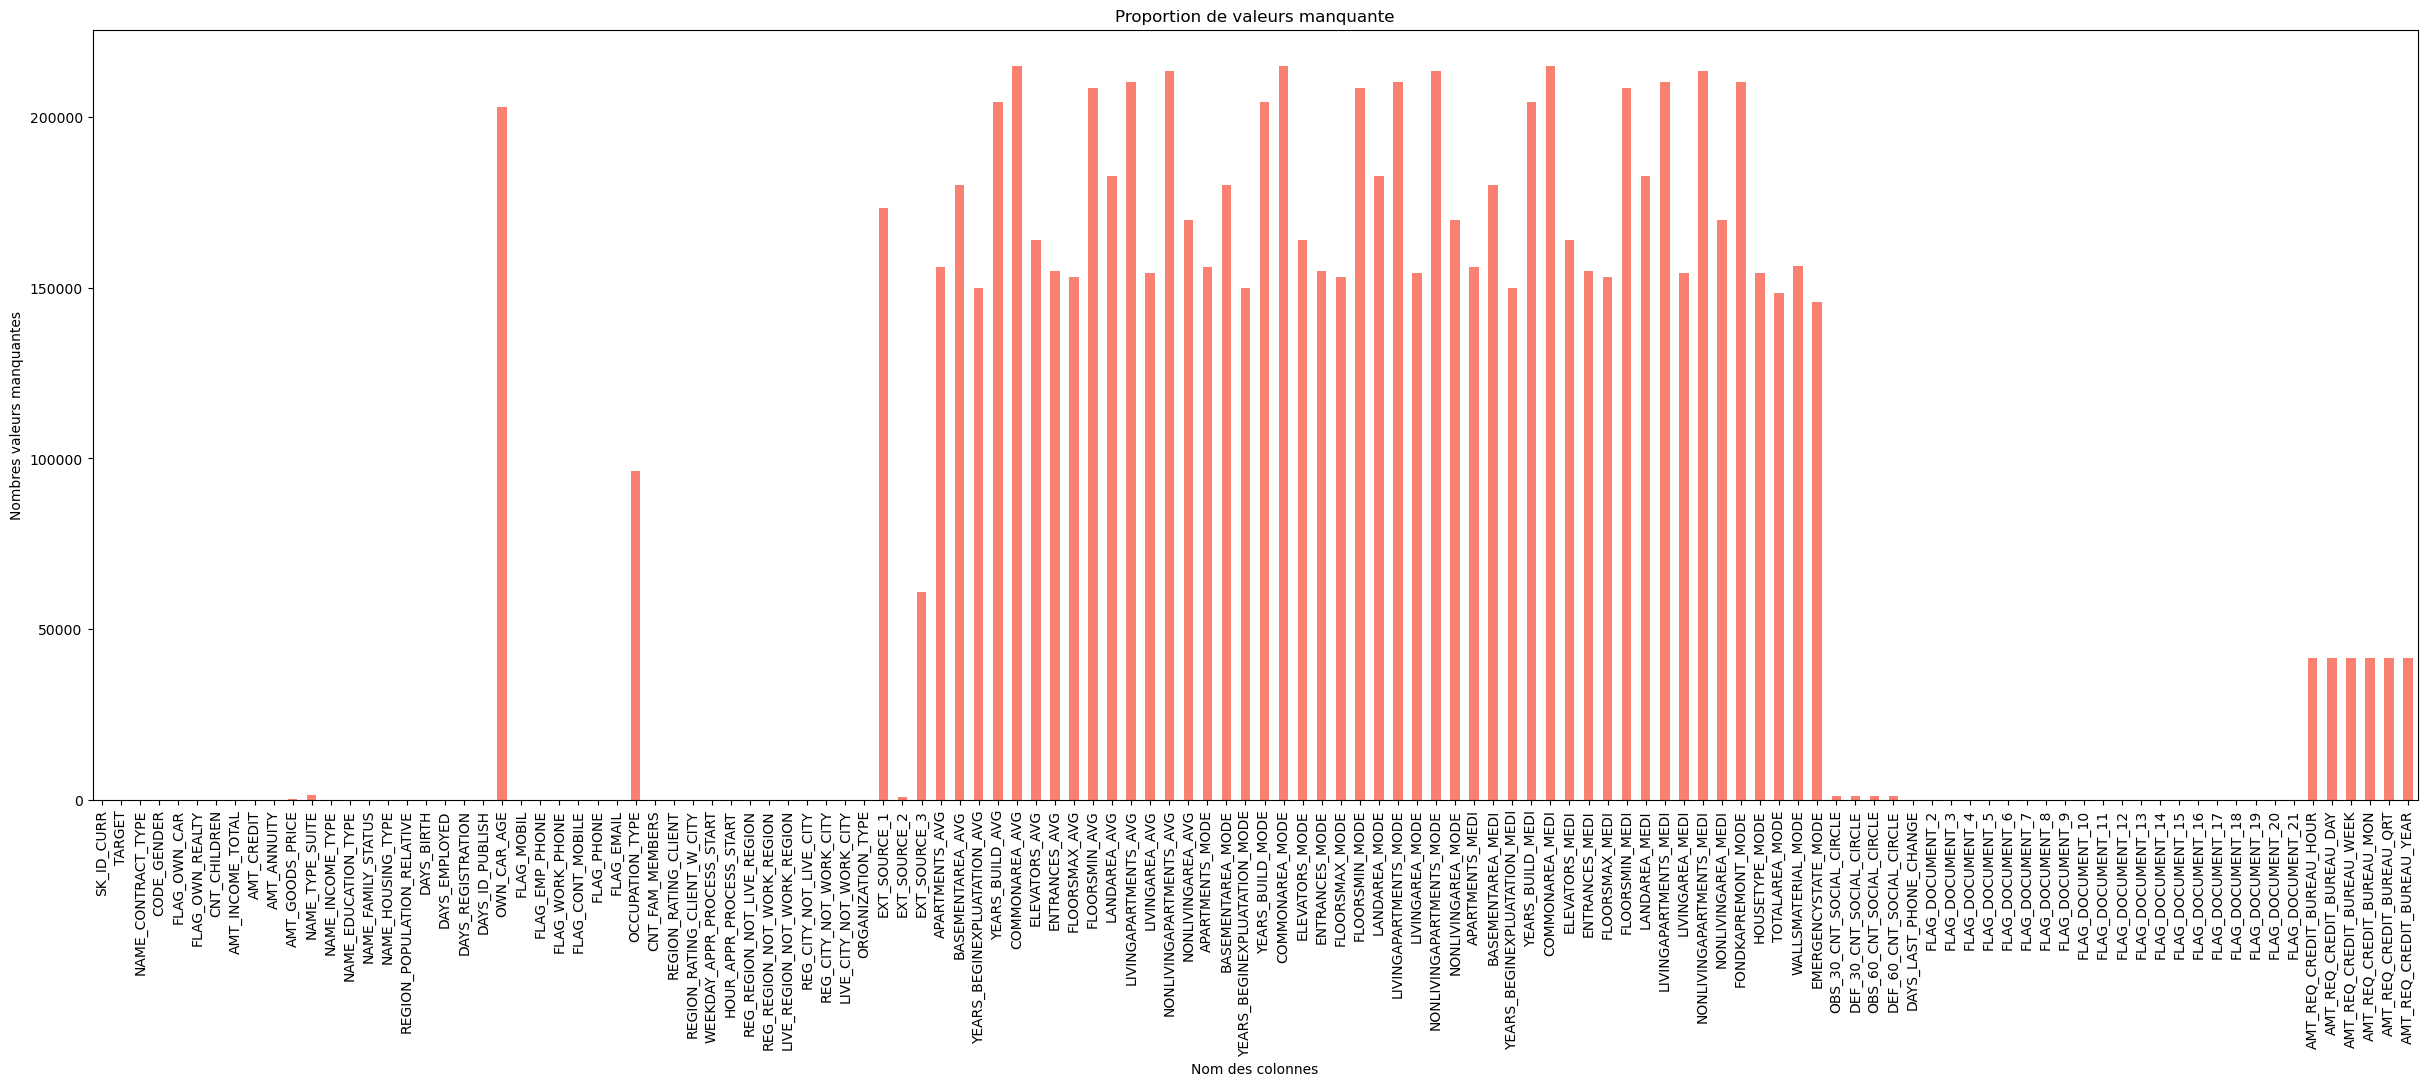

In [10]:
# Vue graphique des valeurs null par colonne
valeur_manquante = data.isnull().sum()

plt.figure(figsize=(30, 10))
valeur_manquante.plot(kind="bar", color="salmon")

plt.title("Proportion de valeurs manquante")
plt.xlabel("Nom des colonnes")
plt.xticks(rotation = 90)
plt.ylabel("Nombres valeurs manquantes")

plt.show

In [11]:
# Classification des variables

# Identification des colonnes quantitatives et qualitatives
colonnes_quantitatives = [col for col in data.select_dtypes(include=["int64", "float64"]).columns if data[col].nunique() >= 10]
colonnes_qualitatives = data.select_dtypes(include=["object", "category"]).columns.tolist() + [col for col in data.select_dtypes(include=["int64", "float64"]).columns if data[col].nunique() < 10]

# Vérification des doublons entre les deux listes
colonnes_quantitatives_set = set(colonnes_quantitatives)
colonnes_qualitatives_set = set(colonnes_qualitatives)
doublons = colonnes_quantitatives_set.intersection(colonnes_qualitatives_set)

# Nombre de colonnes dans le DataFrame
colonnes_totales = set(data.columns)

# Résultats
print(f"\nColonnes quantitatives ({len(colonnes_quantitatives)}):\n" + "\n".join(colonnes_quantitatives))
print(f"\nColonnes qualitatives ({len(colonnes_qualitatives)}):\n" + "\n".join(colonnes_qualitatives))

print(f"\nDoublons entre quantitatives et qualitatives : {len(doublons)}")
print(f"\nColonnes totales : {len(colonnes_totales)}")
print(f"Colonnes non classifiées : {len(colonnes_totales - colonnes_quantitatives_set - colonnes_qualitatives_set)}")


Colonnes quantitatives (67):
SK_ID_CURR
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE
REGION_POPULATION_RELATIVE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH
OWN_CAR_AGE
CNT_FAM_MEMBERS
HOUR_APPR_PROCESS_START
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
APARTMENTS_AVG
BASEMENTAREA_AVG
YEARS_BEGINEXPLUATATION_AVG
YEARS_BUILD_AVG
COMMONAREA_AVG
ELEVATORS_AVG
ENTRANCES_AVG
FLOORSMAX_AVG
FLOORSMIN_AVG
LANDAREA_AVG
LIVINGAPARTMENTS_AVG
LIVINGAREA_AVG
NONLIVINGAPARTMENTS_AVG
NONLIVINGAREA_AVG
APARTMENTS_MODE
BASEMENTAREA_MODE
YEARS_BEGINEXPLUATATION_MODE
YEARS_BUILD_MODE
COMMONAREA_MODE
ELEVATORS_MODE
ENTRANCES_MODE
FLOORSMAX_MODE
FLOORSMIN_MODE
LANDAREA_MODE
LIVINGAPARTMENTS_MODE
LIVINGAREA_MODE
NONLIVINGAPARTMENTS_MODE
NONLIVINGAREA_MODE
APARTMENTS_MEDI
BASEMENTAREA_MEDI
YEARS_BEGINEXPLUATATION_MEDI
YEARS_BUILD_MEDI
COMMONAREA_MEDI
ELEVATORS_MEDI
ENTRANCES_MEDI
FLOORSMAX_MEDI
FLOORSMIN_MEDI
LANDAREA_MEDI
LIVINGAPARTMENTS_MEDI
LIVINGAREA_MEDI
NONLIVINGAPARTM

création de deux listes : une pour les variables quantitatives (avec suffisamment de diversité), une autre pour les qualitatives.

j'exclus les variables numériques avec moins de 10 modalités, que je classes comme qualitatives.

Cela est fondamental pour :

les visualisations (boxplot pour quantitatives, barplot pour qualitatives),

le traitement ultérieur (ANOVA, corrélations, encoding…).

In [12]:
# Quantification des valeurs manquantes (par colonne)

# Nombre total de lignes
nb_null = data.shape[0]

# Liste vide pour le stockage des informations sur les valeurs manquantes
val_null = []

# Lecture de toutes les colonnes du DataFrame
for col in data.columns:
    col_null = data[col].isnull().sum()
    pourcentage = round(col_null / nb_null * 100, 2)
    val_null.append((col, col_null, pourcentage))

# Tri du résultats par pourcentage décroissant
val_null.sort(key=lambda x: x[2], reverse=True)

# Affichage des résultats triés
for col, col_null, pourcentage in val_null:
    print(f"Il manque {col_null} valeurs, soit {pourcentage} % dans la colonne {col}")

Il manque 214865 valeurs, soit 69.87 % dans la colonne COMMONAREA_AVG
Il manque 214865 valeurs, soit 69.87 % dans la colonne COMMONAREA_MODE
Il manque 214865 valeurs, soit 69.87 % dans la colonne COMMONAREA_MEDI
Il manque 213514 valeurs, soit 69.43 % dans la colonne NONLIVINGAPARTMENTS_AVG
Il manque 213514 valeurs, soit 69.43 % dans la colonne NONLIVINGAPARTMENTS_MODE
Il manque 213514 valeurs, soit 69.43 % dans la colonne NONLIVINGAPARTMENTS_MEDI
Il manque 210295 valeurs, soit 68.39 % dans la colonne FONDKAPREMONT_MODE
Il manque 210199 valeurs, soit 68.35 % dans la colonne LIVINGAPARTMENTS_AVG
Il manque 210199 valeurs, soit 68.35 % dans la colonne LIVINGAPARTMENTS_MODE
Il manque 210199 valeurs, soit 68.35 % dans la colonne LIVINGAPARTMENTS_MEDI
Il manque 208642 valeurs, soit 67.85 % dans la colonne FLOORSMIN_AVG
Il manque 208642 valeurs, soit 67.85 % dans la colonne FLOORSMIN_MODE
Il manque 208642 valeurs, soit 67.85 % dans la colonne FLOORSMIN_MEDI
Il manque 204488 valeurs, soit 66.5 

je calcule pour chaque colonne combien de valeurs sont manquantes, et le pourcentage que cela représente.

En les triant du plus élevé au plus faible, j' obtiens une priorisation claire des colonnes problématiques.

In [13]:
data['TARGET'].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

-----------------Corrélation avec la variable TARGET-------------------

Pour repérer quelles variables numériques sont potentiellement liées au risque de non-remboursement.

Variables fortement négativement corrélées (ex : EXT_SOURCE_3, EXT_SOURCE_2, etc.) → souvent bonnes variables prédictives

Une corrélation autour de 0 = peu ou pas de lien linéaire avec la cible

Attention : corrélation ≠ causalité

In [14]:
# Corrélation des variables numériques avec TARGET
correlations = data.corr(numeric_only=True)['TARGET'].sort_values(ascending=False)

# Top 10 des variables les plus positivement corrélées avec TARGET
print("Variables les plus positivement corrélées avec TARGET :")
print(correlations.head(10))

# Top 10 des variables les plus négativement corrélées avec TARGET
print("\n Variables les plus négativement corrélées avec TARGET :")
print(correlations.tail(10))

Variables les plus positivement corrélées avec TARGET :
TARGET                         1.000000
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
Name: TARGET, dtype: float64

 Variables les plus négativement corrélées avec TARGET :
ELEVATORS_AVG                -0.034199
REGION_POPULATION_RELATIVE   -0.037227
AMT_GOODS_PRICE              -0.039645
FLOORSMAX_MODE               -0.043226
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_AVG                -0.044003
DAYS_EMPLOYED                -0.044932
EXT_SOURCE_1                 -0.155317
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_3                 -0.178919
Name: TARGET, dtype: float64


---------Variables catégorielles (object)-----

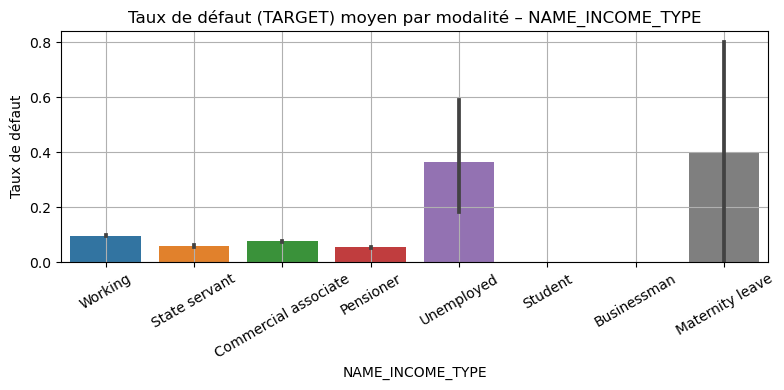

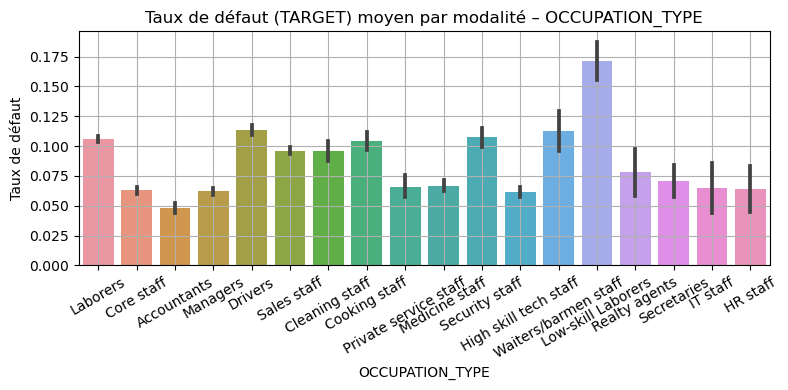

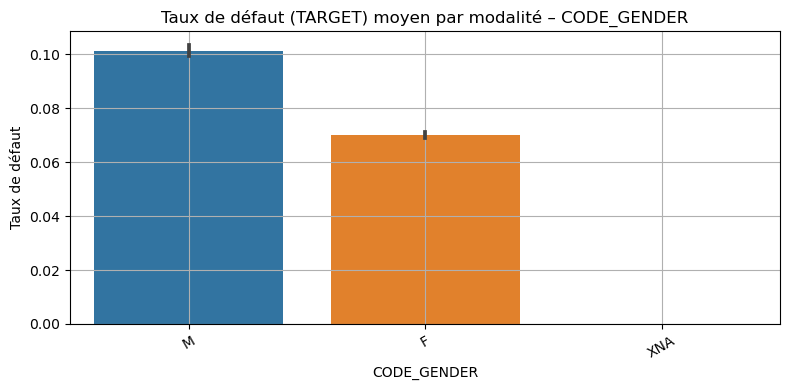

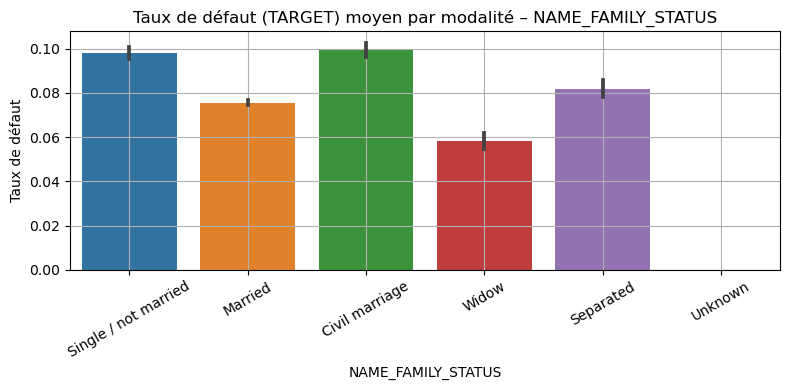

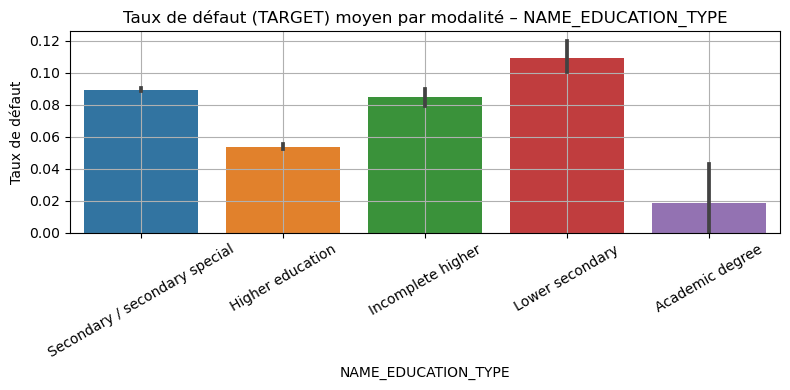

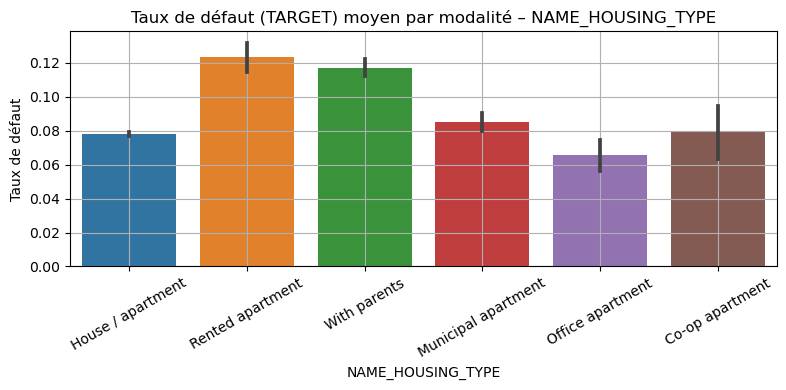

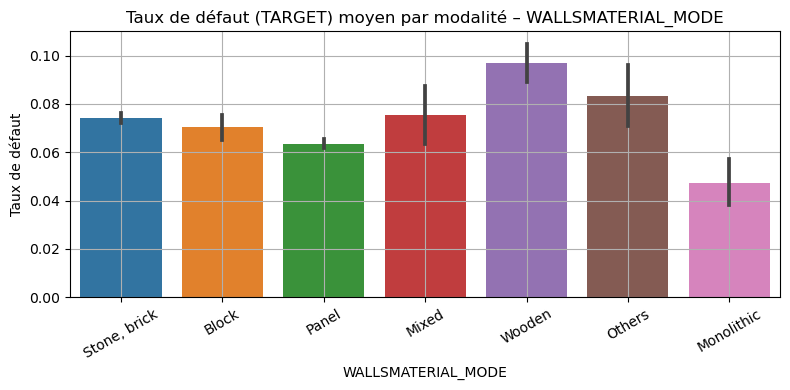

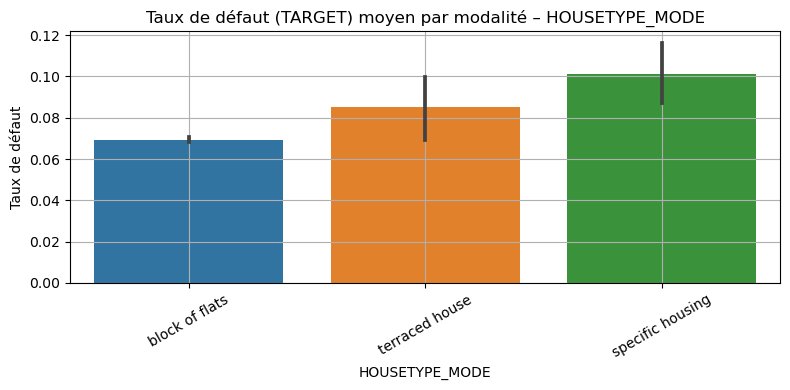

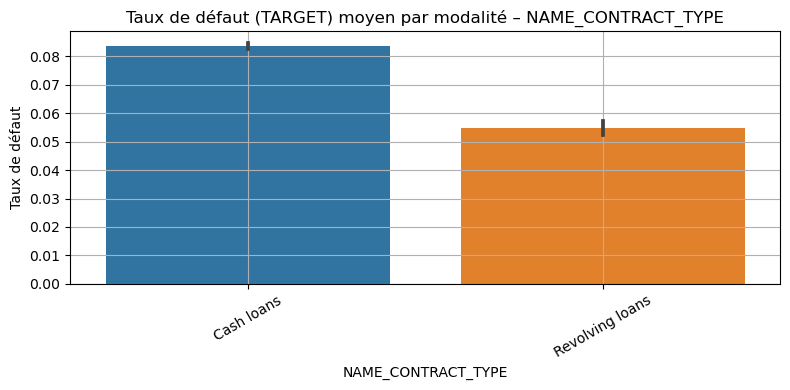

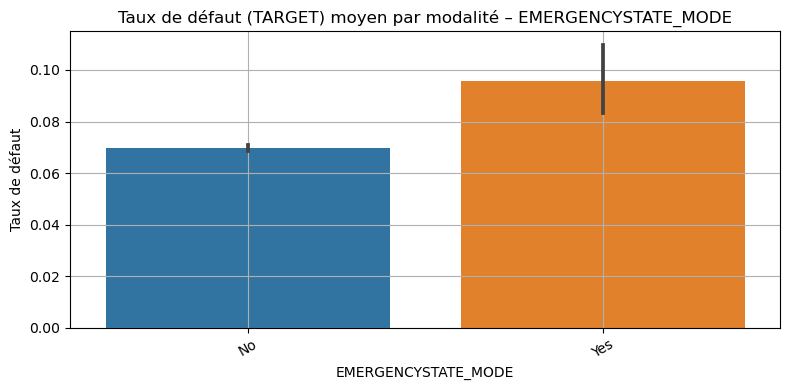

In [15]:
cat_cols = data.select_dtypes(include='object').columns
impact_scores_cat = {}

for col in cat_cols:
    if data[col].nunique() < 20:
        mean_target = data.groupby(col)['TARGET'].mean()
        score = mean_target.max() - mean_target.min()
        impact_scores_cat[col] = score

top_cat = sorted(impact_scores_cat.items(), key=lambda x: x[1], reverse=True)[:10]

for col, _ in top_cat:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=col, y='TARGET', data=data)
    plt.title(f"Taux de défaut (TARGET) moyen par modalité – {col}")
    plt.ylabel("Taux de défaut")
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.grid(True)
    plt.show()

Variables qualitatives binaires (int à 2 modalités)

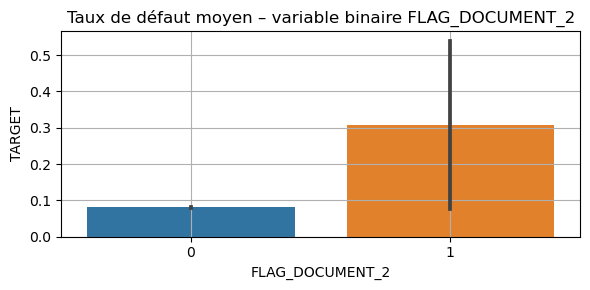

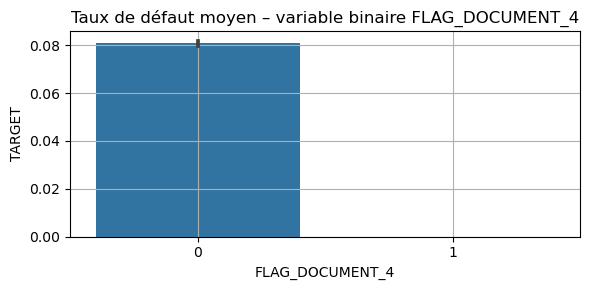

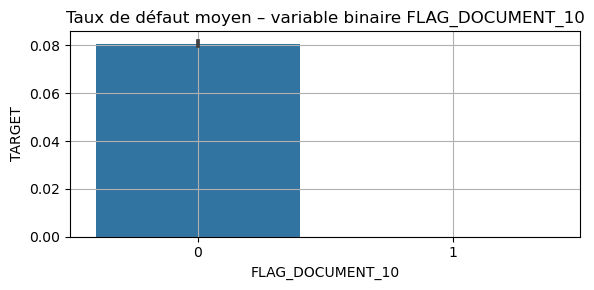

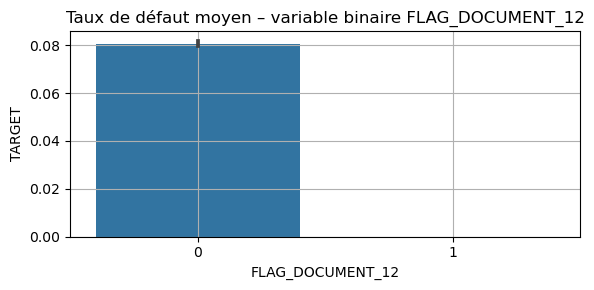

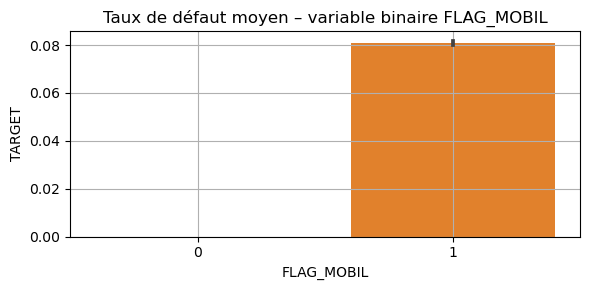

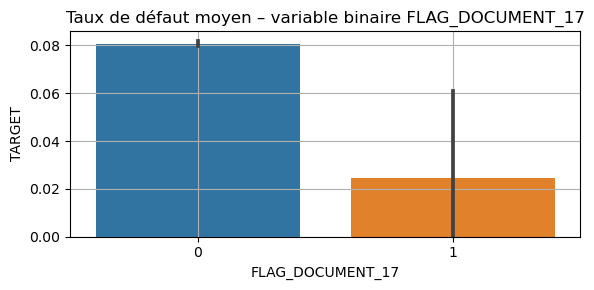

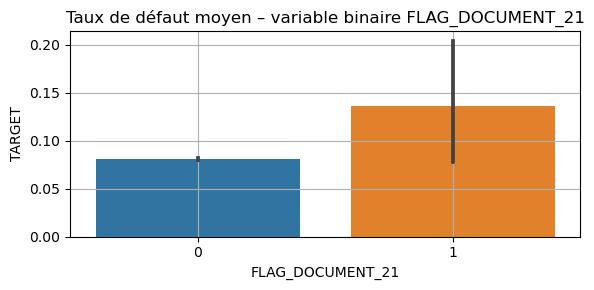

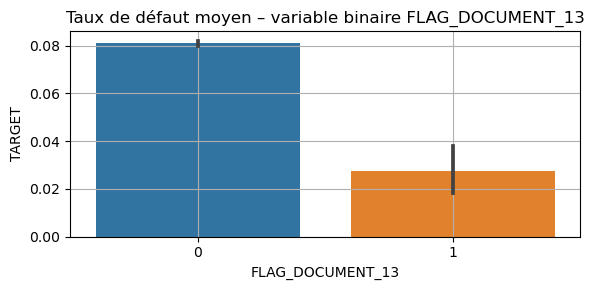

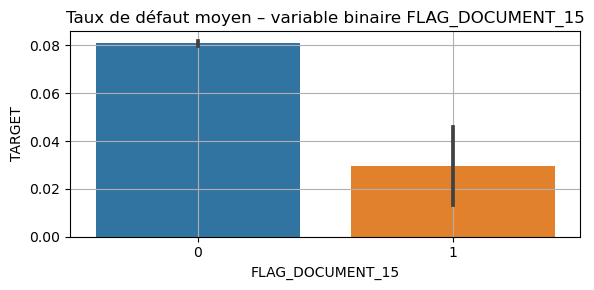

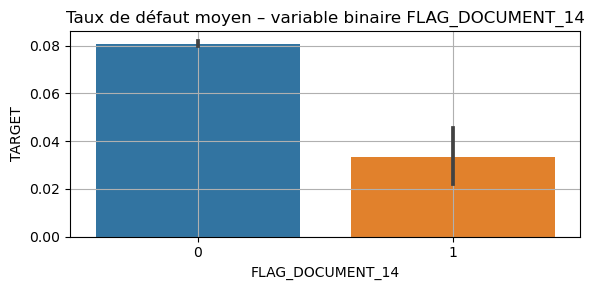

In [16]:
binary_cols = [col for col in data.select_dtypes(include='int64').columns 
               if data[col].nunique() == 2 and col != 'TARGET']

impact_scores_bin = {}

for col in binary_cols:
    score = abs(data.groupby(col)['TARGET'].mean().diff().dropna().values[0])
    impact_scores_bin[col] = score

top_bin = sorted(impact_scores_bin.items(), key=lambda x: x[1], reverse=True)[:10]

for col, _ in top_bin:
    plt.figure(figsize=(6, 3))
    sns.barplot(x=col, y='TARGET', data=data)
    plt.title(f"Taux de défaut moyen – variable binaire {col}")
    plt.tight_layout()
    plt.grid(True)
    plt.show()

Variables quantitatives entières (int64 avec >2 modalités)

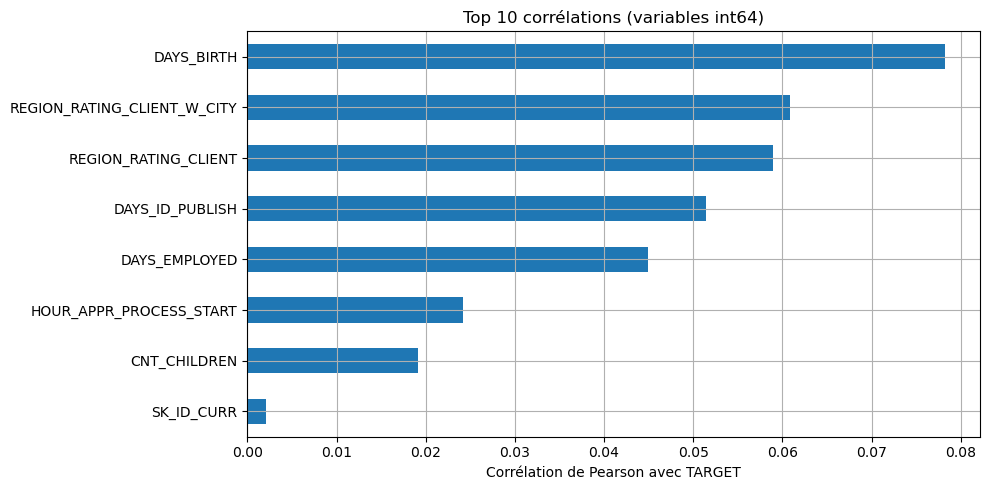

In [17]:
int_cols = [col for col in data.select_dtypes(include='int64').columns 
            if data[col].nunique() > 2 and col != 'TARGET']

corrs_int = data[int_cols + ['TARGET']].corr()['TARGET'].drop('TARGET')
top_corrs_int = corrs_int.abs().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_corrs_int.plot(kind='barh')
plt.title("Top 10 corrélations (variables int64)")
plt.xlabel("Corrélation de Pearson avec TARGET")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

Variables quantitatives décimales (float64)

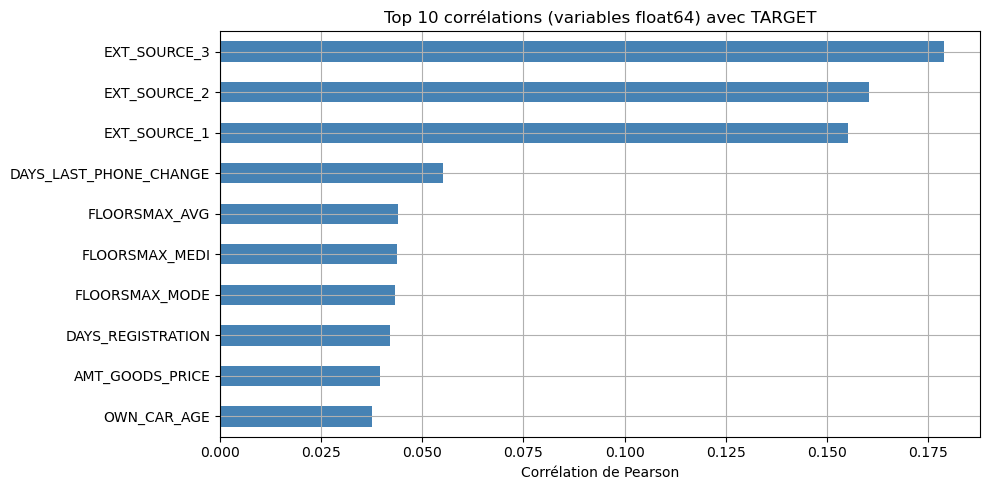

In [18]:
# Sélection des colonnes float + ajout explicite de 'TARGET'
float_cols = data.select_dtypes(include='float64').columns.tolist()

# On ajoute TARGET si elle n'est pas déjà dedans
cols_for_corr = float_cols + ['TARGET'] if 'TARGET' not in float_cols else float_cols

# Calcul des corrélations avec TARGET uniquement
corrs_float = data[cols_for_corr].corr()['TARGET'].drop('TARGET')
top_corrs_float = corrs_float.abs().sort_values(ascending=False).head(10)

# Affichage
plt.figure(figsize=(10, 5))
top_corrs_float.plot(kind='barh', color='steelblue')
plt.title("Top 10 corrélations (variables float64) avec TARGET")
plt.xlabel("Corrélation de Pearson")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()

Variables importantes à conserver :

EXT_SOURCE_1, EXT_SOURCE_2, EXT_SOURCE_3

NAME_INCOME_TYPE, CODE_GENDER, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS

OCCUPATION_TYPE

DAYS_BIRTH, DAYS_EMPLOYED, DAYS_LAST_PHONE_CHANGE

AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE

FLAG_DOCUMENT_2, FLAG_DOCUMENT_21

Variables à regrouper ou encoder avec soin :

Modalités rares dans variables catégorielles

Variables binaires très déséquilibrées

EXT_SOURCE_3/2/1 : Scores externes (fournis par d'autres organismes) → plus le score est haut, moins il y a de risque

DAYS_EMPLOYED : Plus longtemps employé = plus stable = moins de risque

AMT_GOODS_PRICE	: Valeur du bien → plus élevé = moins de risque ?

REGION_POPULATION_RELATIVE : Moins de densité = moins de risque ?

ELEVATORS_AVG : Variable immobilière (équipements) — effet difficile à interpréter seul

-----------visualiser quelques-unes de ces variables par classe TARGET------------

(EXT_SOURCE_3 - EXT_SOURCE_2 - DAYS_BIRTH - DAYS_EMPLOYED) sont des variables bien corrélées et Leur effet est interprétable

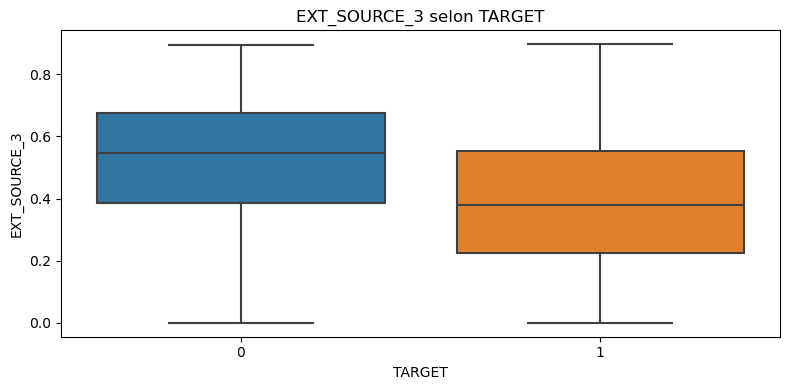

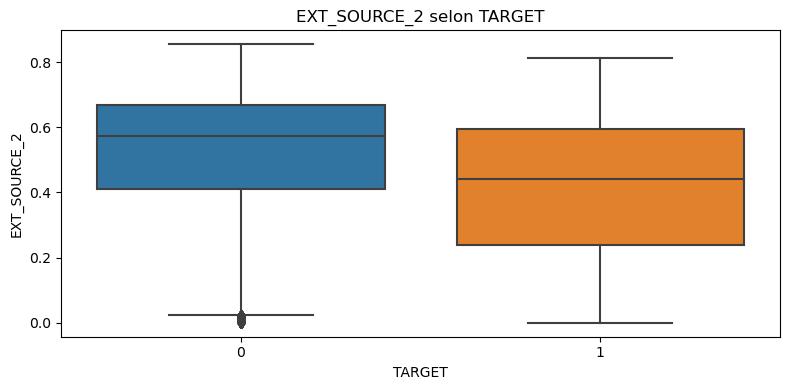

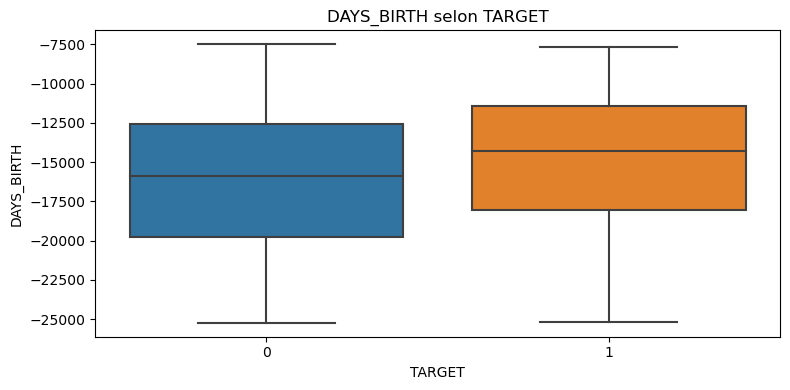

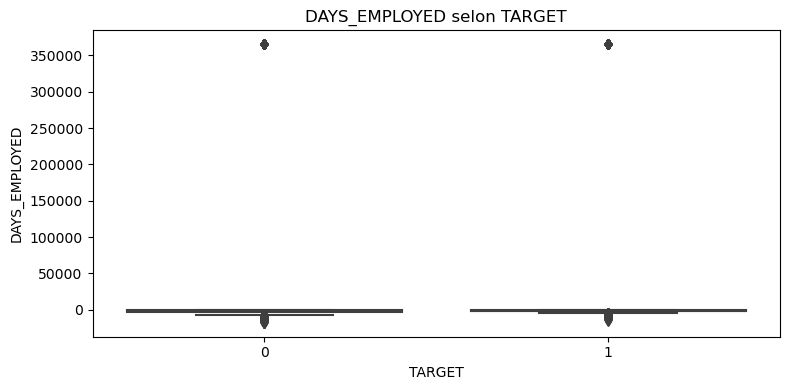

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

variables_a_visualiser = ['EXT_SOURCE_3', 'EXT_SOURCE_2', 'DAYS_BIRTH', 'DAYS_EMPLOYED']

for var in variables_a_visualiser:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=data, x='TARGET', y=var)
    plt.title(f"{var} selon TARGET")
    plt.xlabel("TARGET")
    plt.ylabel(var)
    plt.tight_layout()
    plt.show()

EXT_SOURCE_3 & EXT_SOURCE_2
Ces deux variables sont des scores externes de crédit.
Plus le score est élevé, plus l'individu semble fiable.

Observation :
Pour les TARGET = 0 (bons payeurs), la médiane est clairement plus haute
Pour les TARGET = 1 (mauvais payeurs), la distribution est décalée vers le bas

Très bon pouvoir discriminant : ces variables sont prédictives, on va les garder pour le modèle.

DAYS_BIRTH (âge du client)
Plus cette valeur est négative, plus le client est âgé. Donc :
-25 000 jours ≈ 68 ans
-10 000 jours ≈ 27 ans

Observation :
Les mauvais payeurs (TARGET = 1) sont plus jeunes
Les bons payeurs ont tendance à être plus âgés

Très bonne variable à garder aussi, très intuitive.

DAYS_EMPLOYED (durée d’emploi) --utile pour indiquer qu’un client n’a pas d’emploi (chômeur, étudiant, retraité...)--.
Problème visible :
Valeurs très élevées (genre 365243) = valeurs aberrantes

Ces outliers écrasent la distribution et rendent la visualisation difficile

Ce qu'on doit faire ensuite :
Créer un filtre pour corriger cette valeur aberrante
Revisualiser la variable après nettoyage

---Nettoyer proprement---

In [20]:
# Valeur aberrante
valeur_aberrante = 365243

# Création d'une nouvelle variable booléenne : le client a-t-il un emploi ?
data['HAS_JOB'] = (data['DAYS_EMPLOYED'] != valeur_aberrante).astype(int)

# Remplacer la valeur aberrante par NaN
data['DAYS_EMPLOYED_CLEANED'] = data['DAYS_EMPLOYED'].replace(valeur_aberrante, np.nan)

# Vérification rapide
print(data[['DAYS_EMPLOYED', 'DAYS_EMPLOYED_CLEANED', 'HAS_JOB']].sample(5))

        DAYS_EMPLOYED  DAYS_EMPLOYED_CLEANED  HAS_JOB
103118         365243                    NaN        0
285433           -757                 -757.0        1
27626           -2787                -2787.0        1
47343           -1281                -1281.0        1
211884           -958                 -958.0        1


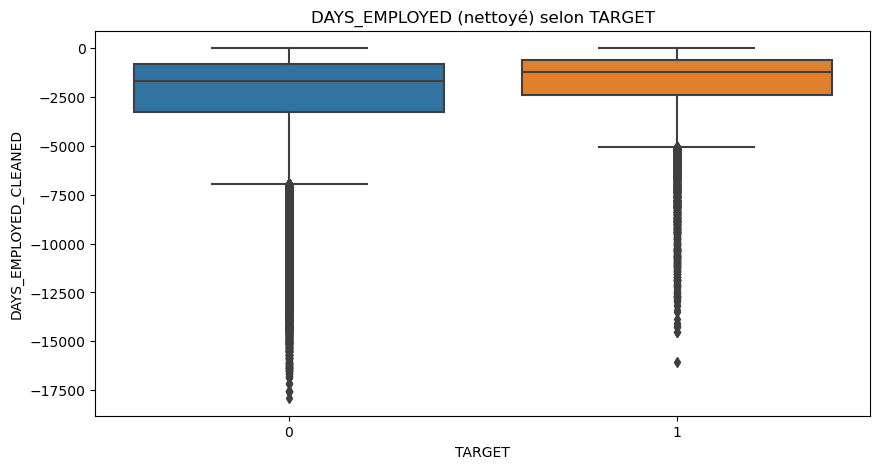

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(x='TARGET', y='DAYS_EMPLOYED_CLEANED', data=data)
plt.title("DAYS_EMPLOYED (nettoyé) selon TARGET")
plt.show()

Les personnes qui ont fait défaut (TARGET=1) ont tendance à avoir moins de jours d’ancienneté que les bons payeurs.
La différence n’est pas gigantesque, mais légèrement significative. Je garde

----Analyse de variables qualitatives-----

On peut explorer visuellement :

NAME_CONTRACT_TYPE → (Cash loans / Revolving loans) - 
CODE_GENDER → (M / F) - 
NAME_INCOME_TYPE → (Working, Pensioner, etc.) - 
HAS_JOB → (celle que j'ai créée)

Objectif :
Comparer la répartition de TARGET dans chaque catégorie.

In [22]:
def plot_categorical_distribution(feature):
    ct = pd.crosstab(data[feature], data['TARGET'], normalize='index') * 100
    ct.plot(kind='bar', stacked=True, figsize=(8,5), colormap='coolwarm')
    plt.title(f"Répartition de TARGET selon {feature}")
    plt.ylabel("Pourcentage (%)")
    plt.xlabel(feature)
    plt.legend(title='TARGET', loc='upper right')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

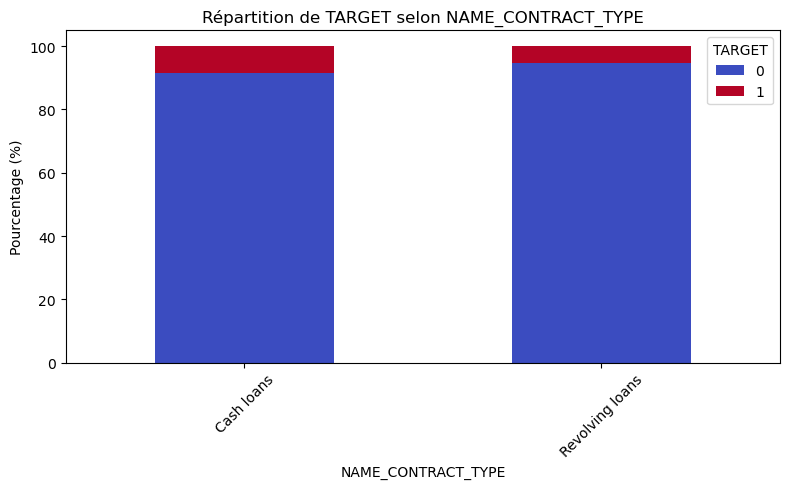

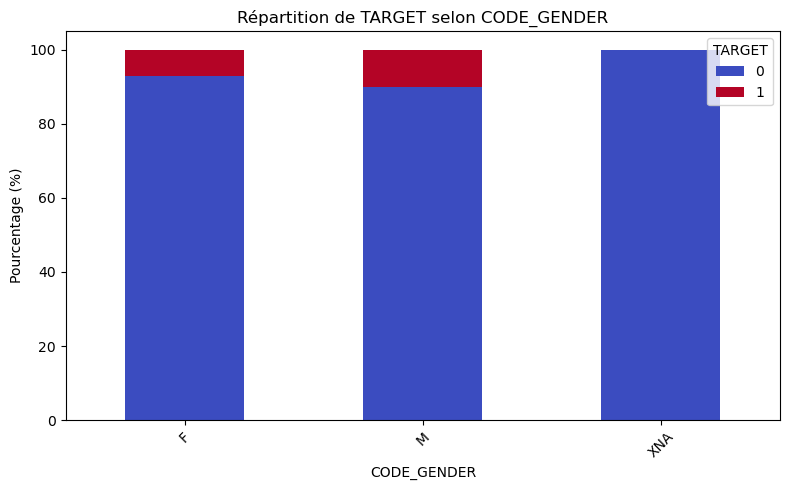

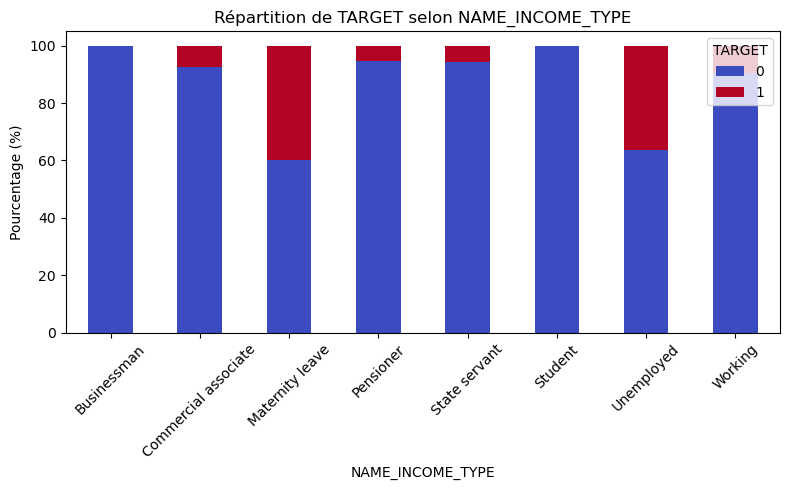

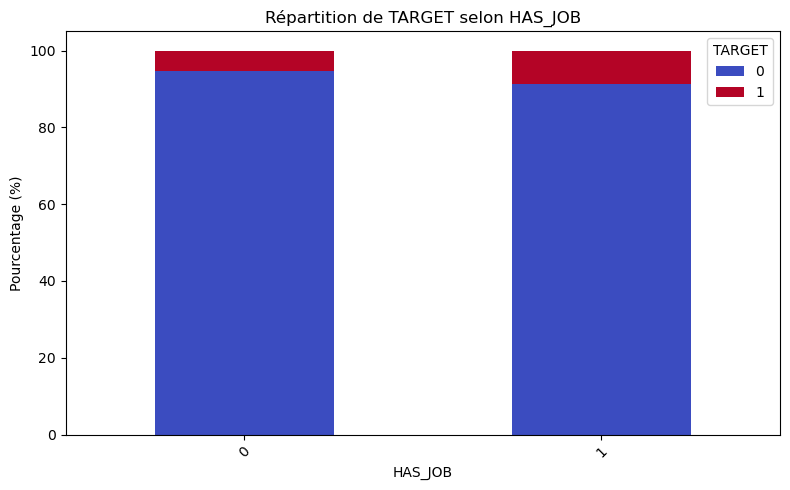

In [23]:
plot_categorical_distribution("NAME_CONTRACT_TYPE")
plot_categorical_distribution("CODE_GENDER")
plot_categorical_distribution("NAME_INCOME_TYPE")
plot_categorical_distribution("HAS_JOB")

In [24]:
# Assurons-nous que HAS_JOB est bien une colonne binaire (0 = pas de job, 1 = a un job)

# Pourcentage de chaque catégorie
pourcentage_job = data['HAS_JOB'].value_counts(normalize=True) * 100

# Affichage propre
print("Répartition des clients selon HAS_JOB (%):")
print(pourcentage_job)

Répartition des clients selon HAS_JOB (%):
HAS_JOB
1    81.992839
0    18.007161
Name: proportion, dtype: float64


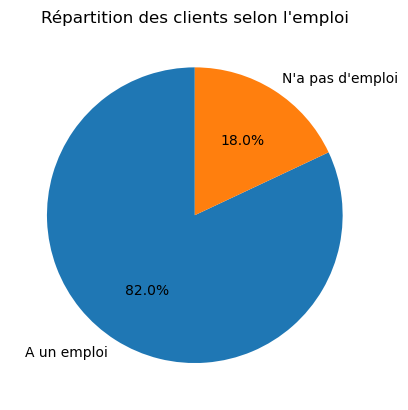

In [25]:
pourcentage_job.plot.pie(autopct='%1.1f%%', startangle=90, labels=['A un emploi', "N'a pas d'emploi"])
plt.title("Répartition des clients selon l'emploi")
plt.ylabel("")  # Pour enlever le label y
plt.show()

In [26]:
# Moyenne de TARGET pour chaque groupe HAS_JOB
default_rate_by_job = data.groupby('HAS_JOB')['TARGET'].mean() * 100

print("\nTaux de défaut (% de TARGET = 1) selon HAS_JOB :")
print(default_rate_by_job)


Taux de défaut (% de TARGET = 1) selon HAS_JOB :
HAS_JOB
0    5.399646
1    8.659975
Name: TARGET, dtype: float64


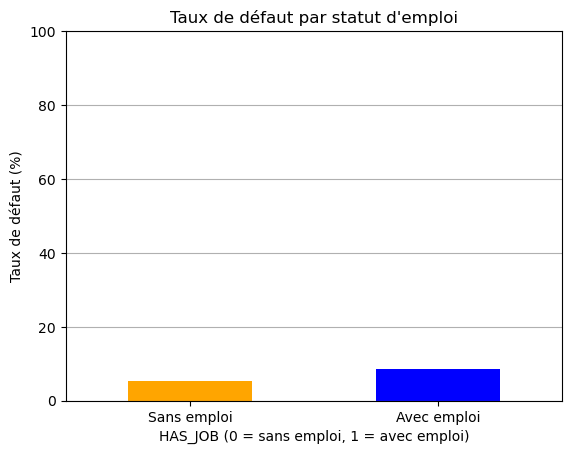

In [27]:
# Bar chart du taux de défaut
default_rate_by_job.plot(kind='bar', color=['orange', 'blue'])
plt.title("Taux de défaut par statut d'emploi")
plt.xlabel("HAS_JOB (0 = sans emploi, 1 = avec emploi)")
plt.ylabel("Taux de défaut (%)")
plt.xticks([0, 1], ['Sans emploi', 'Avec emploi'], rotation=0)
plt.ylim(0, 100)
plt.grid(axis='y')
plt.show()

In [28]:
# Sélection des colonnes de type "object" (catégorielles)
cat_cols = data.select_dtypes(include='object').columns

# Affichage du nombre de colonnes catégorielles
print(f"Nombre de variables catégorielles : {len(cat_cols)}\n")

# Affichage du nombre de modalités uniques pour chaque variable catégorielle
for col in cat_cols:
    print(f"{col}: {data[col].nunique()} valeurs uniques")

Nombre de variables catégorielles : 16

NAME_CONTRACT_TYPE: 2 valeurs uniques
CODE_GENDER: 3 valeurs uniques
FLAG_OWN_CAR: 2 valeurs uniques
FLAG_OWN_REALTY: 2 valeurs uniques
NAME_TYPE_SUITE: 7 valeurs uniques
NAME_INCOME_TYPE: 8 valeurs uniques
NAME_EDUCATION_TYPE: 5 valeurs uniques
NAME_FAMILY_STATUS: 6 valeurs uniques
NAME_HOUSING_TYPE: 6 valeurs uniques
OCCUPATION_TYPE: 18 valeurs uniques
WEEKDAY_APPR_PROCESS_START: 7 valeurs uniques
ORGANIZATION_TYPE: 58 valeurs uniques
FONDKAPREMONT_MODE: 4 valeurs uniques
HOUSETYPE_MODE: 3 valeurs uniques
WALLSMATERIAL_MODE: 7 valeurs uniques
EMERGENCYSTATE_MODE: 2 valeurs uniques


In [29]:
# Copie du DataFrame original pour préserver l'état initial
data_encoded = data.copy()

# Encodage binaire : remplacement Y/N par 1/0
binary_cols = ['FLAG_OWN_CAR', 'FLAG_OWN_REALTY']
for col in binary_cols:
    data_encoded[col] = data_encoded[col].map({'Y': 1, 'N': 0})

# Variables catégorielles à encoder en one-hot (choix raisonné)
one_hot_cols = [
    'CODE_GENDER',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'WEEKDAY_APPR_PROCESS_START'
]

# Encodage one-hot (drop_first=True évite la redondance)
data_encoded = pd.get_dummies(data_encoded, columns=one_hot_cols, drop_first=True)

# ✅ Rajouter les deux colonnes calculées dans l'analyse
data_encoded['DAYS_EMPLOYED_CLEANED'] = data['DAYS_EMPLOYED_CLEANED']
data_encoded['HAS_JOB'] = data['HAS_JOB']

# Vérification rapide
print(f"Forme du dataset après encodage : {data_encoded.shape}")
data_encoded.head()

Forme du dataset après encodage : (307511, 147)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents,WEEKDAY_APPR_PROCESS_START_MONDAY,WEEKDAY_APPR_PROCESS_START_SATURDAY,WEEKDAY_APPR_PROCESS_START_SUNDAY,WEEKDAY_APPR_PROCESS_START_THURSDAY,WEEKDAY_APPR_PROCESS_START_TUESDAY,WEEKDAY_APPR_PROCESS_START_WEDNESDAY
0,100002,1,Cash loans,0,1,0,202500.0,406597.5,24700.5,351000.0,...,False,False,False,False,False,False,False,False,False,True
1,100003,0,Cash loans,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,False,False,False,False,True,False,False,False,False,False
2,100004,0,Revolving loans,1,1,0,67500.0,135000.0,6750.0,135000.0,...,False,False,False,False,True,False,False,False,False,False
3,100006,0,Cash loans,0,1,0,135000.0,312682.5,29686.5,297000.0,...,False,False,False,False,False,False,False,False,False,True
4,100007,0,Cash loans,0,1,0,121500.0,513000.0,21865.5,513000.0,...,False,False,False,False,False,False,False,True,False,False


---NAME_CONTRACT_TYPE---
Cash loans ➝ taux de défaut (TARGET = 1) plus élevé que pour Revolving loans.
Revolving loans sont moins risqués dans le dataset.

Cette variable a un pouvoir prédictif modéré : je garde

---CODE_GENDER---
Hommes (M) ont un taux de défaut plus élevé que les femmes (F).
Il y a une 3e modalité "XNA" très minoritaire → à traiter plus tard (éliminer ou regrouper).

Variable utile et discriminante : à conserver
On pourra aussi la transformer en variable binaire (IS_MALE, par ex.)

---NAME_INCOME_TYPE---
Maternity leave et Unemployed ➝ taux de défaut très élevé (~40%)
Pensioner, Student, Working ➝ taux plus faible
Très bonne séparation entre groupes

Variable très pertinente
Attention à la taille des groupes (ex. : Businessman, Student) → petits effectifs ?

---HAS_JOB---
Différence visible : ceux sans emploi (HAS_JOB = 0) sont plus souvent en défaut que ceux avec emploi.
Variable que j'ai construite à partir de DAYS_EMPLOYED

Variable binaire simple mais pertinente : je garde

In [30]:
# Chargement du fichier original
data = pd.read_csv("application_train.csv")

# Création des variables dérivées
data['DAYS_EMPLOYED_CLEANED'] = data['DAYS_EMPLOYED'].replace(365243, np.nan)
data['HAS_JOB'] = data['DAYS_EMPLOYED_CLEANED'].notnull().astype(int)
data['OWN_CAR_AGE'] = data['OWN_CAR_AGE'].fillna(0)

# Encodage binaire
data['FLAG_OWN_CAR'] = data['FLAG_OWN_CAR'].map({'Y': 1, 'N': 0})
data['FLAG_OWN_REALTY'] = data['FLAG_OWN_REALTY'].map({'Y': 1, 'N': 0})

# Sélection des variables retenues
selected_vars = [
    'TARGET',
    'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
    'DAYS_BIRTH', 'DAYS_EMPLOYED_CLEANED', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE',
    'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
    'OWN_CAR_AGE', 'HAS_JOB',
    'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
    'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_21',
    'CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE'
]

# Sous-ensemble de données
data_model = data[selected_vars].dropna()

# Encodage one-hot sur les variables catégorielles (drop_first pour éviter redondance)
one_hot_cols = [
    'CODE_GENDER', 'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE'
]

data_ready = pd.get_dummies(data_model, columns=one_hot_cols, drop_first=True)

# Export vers CSV pour le fichier de modélisation
data_ready.to_csv("data_cleaned_ready.csv", index=False)

# Vérification
print(f"✅ Données prêtes pour la modélisation : {data_ready.shape[0]} lignes, {data_ready.shape[1]} colonnes.")
data_ready.head()

✅ Données prêtes pour la modélisation : 98859 lignes, 41 colonnes.


,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH,DAYS_EMPLOYED_CLEANED,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,AMT_INCOME_TOTAL,AMT_CREDIT,...,NAME_EDUCATION_TYPE_Secondary / secondary special,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,1,0.083037,0.262949,0.139376,-9461,-637.0,-3648.0,-1134.0,202500.0,406597.5,...,True,False,False,True,False,True,False,False,False,False
6,0,0.774761,0.724000,0.492060,-13778,-3130.0,-1213.0,-1562.0,171000.0,1560726.0,...,False,True,False,False,False,True,False,False,False,False
10,0,0.319760,0.651862,0.363945,-10197,-679.0,-4427.0,-844.0,112500.0,652500.0,...,False,True,False,False,False,True,False,False,False,False
12,0,0.464831,0.715042,0.176653,-13439,-2717.0,-311.0,-2370.0,67500.0,80865.0,...,True,True,False,False,False,True,False,False,False,False
15,0,0.115634,0.346634,0.678568,-8728,-1157.0,-3494.0,-925.0,157500.0,299772.0,...,True,False,False,True,False,False,False,False,True,False


In [31]:
# # Exportation des données nettoyées pour la modélisation
# # data.to_csv("p4_X_clean.csv", index=False)
# data_encoded.to_csv("p4_X_clean_encoded.csv", index=False)